# Librerías

In [177]:
#!pip install d2l==0.17.1

In [178]:
#!pip uninstall matplotlib
#!pip install matplotlib==3.1.3

In [179]:
import numpy as np
import pandas as pd 
import os
from torch import nn
from d2l import torch as d2l
import torch
import matplotlib as plt
from sklearn.model_selection import train_test_split

# Datos

In [180]:
df = pd.read_csv('/content/drive/MyDrive/Data/Hotel_Reviews.csv')
df

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/30/2015,8.1,Atlantis Hotel Vienna,Kuwait,no trolly or staff to help you take the lugga...,14,2823,location,2,8,7.0,"[' Leisure trip ', ' Family with older childre...",704 day,48.203745,16.335677
515734,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/22/2015,8.1,Atlantis Hotel Vienna,Estonia,The hotel looks like 3 but surely not 4,11,2823,Breakfast was ok and we got earlier check in,11,12,5.8,"[' Leisure trip ', ' Family with young childre...",712 day,48.203745,16.335677
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/19/2015,8.1,Atlantis Hotel Vienna,Egypt,The ac was useless It was a hot week in vienn...,19,2823,No Positive,0,3,2.5,"[' Leisure trip ', ' Family with older childre...",715 day,48.203745,16.335677
515736,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/17/2015,8.1,Atlantis Hotel Vienna,Mexico,No Negative,0,2823,The rooms are enormous and really comfortable...,25,3,8.8,"[' Leisure trip ', ' Group ', ' Standard Tripl...",717 day,48.203745,16.335677




1.   Eliminamos los datos "No Negative" y "No Positive" que podrían afectar elentrenamiento. 
2.   Balanceamos los datos

3.   Establecemos 2 categorías de predicción, 0 para positivos y 1 para negativos.
4.   separamos los datos en test y train

5.   Almacenamos en una tupla










In [181]:
Negatives = [value for value in df['Negative_Review'].tolist() if value != 'No Negative']
Positives = [value for value in df['Positive_Review'].tolist() if value != 'No Positive']


print( f'Cantidad de Reviews Negativas: {len(Negatives)}, Cantidad de Reviews Positivas: {len(Positives)}')


while len(Positives) >  5000:
    Positives.pop()
while len(Negatives) >  5000:
    Negatives.pop()
print('---------------------------------------------------------------------------------------------------')
print('Luego del Balanceo tenemos:')
print( f'Cantidad de Reviews Negativas: {len(Negatives)}, Cantidad de Reviews Positivas: {len(Positives)}')


train_data_N, test_data_N = train_test_split(Negatives, test_size=0.2, random_state=42)
train_data_P, test_data_P = train_test_split(Positives, test_size=0.2, random_state=42)

labels0 = [0 for value in train_data_P]
labels00 = [0 for value in test_data_P]
labels1 = [1 for value in train_data_N]
labels11 = [1 for value in test_data_P]

train_data = train_data_P + train_data_N
test_data = test_data_P + test_data_N
labels_train = labels0 + labels1
labels_test = labels00 + labels11

train_data = train_data, labels_train
test_data = test_data, labels_test

print('---------------------------------------------------------------------------------------------------')
print('Luego de la separación entre train y test tenemos:')
print( f'Cantidad de Reviews en train: {len(train_data[0])}, Cantidad de Reviews en test: {len(test_data[0])}')

Cantidad de Reviews Negativas: 387848, Cantidad de Reviews Positivas: 479792
---------------------------------------------------------------------------------------------------
Luego del Balanceo tenemos:
Cantidad de Reviews Negativas: 10000, Cantidad de Reviews Positivas: 10000
---------------------------------------------------------------------------------------------------
Luego de la separación entre train y test tenemos:
Cantidad de Reviews en train: 16000, Cantidad de Reviews en test: 4000


Tokenizamos nuestra data, establecemos nuestro vocabulario y eliminamos las palabras que aparecen menos de 5 veces.

In [182]:
train_tokens = d2l.tokenize(train_data[0], token='word')
test_tokens = d2l.tokenize(test_data[0], token='word')
vocab = d2l.Vocab(train_tokens, min_freq=5)

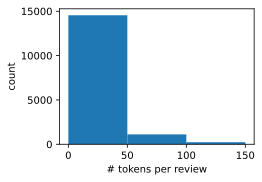

In [183]:
d2l.set_figsize()
d2l.plt.xlabel('# tokens per review')
d2l.plt.ylabel('count')
d2l.plt.hist([len(line) for line in train_tokens], bins=range(0, 200, 50));

In [184]:
num_steps=150
batch_size = 6

train_features = torch.tensor([d2l.truncate_pad(vocab[line], num_steps, vocab['<pad>']) for line in train_tokens])
test_features = torch.tensor([d2l.truncate_pad(vocab[line], num_steps, vocab['<pad>']) for line in test_tokens])
train_iter = d2l.load_array((train_features, torch.tensor(train_data[1])), batch_size)
test_iter = d2l.load_array((test_features, torch.tensor(test_data[1])),batch_size, is_train=False)

In [185]:
class BiRNN(nn.Module):
    def __init__(self, vocab_size, embed_size, num_hiddens,
                 num_layers, **kwargs):
        super(BiRNN, self).__init__(**kwargs)
        self.embedding = nn.Embedding(vocab_size, embed_size)
        # Set `bidirectional` to True to get a bidirectional RNN
        self.encoder = nn.LSTM(embed_size, num_hiddens, num_layers=num_layers,
                                bidirectional=True)
        self.decoder = nn.Linear(4 * num_hiddens, 2)

    def forward(self, inputs):
        # The shape of `inputs` is (batch size, no. of time steps). Because
        # LSTM requires its input's first dimension to be the temporal
        # dimension, the input is transposed before obtaining token
        # representations. The output shape is (no. of time steps, batch size,
        # word vector dimension)
        embeddings = self.embedding(inputs.T)
        self.encoder.flatten_parameters()
        # Returns hidden states of the last hidden layer at different time
        # steps. The shape of `outputs` is (no. of time steps, batch size,
        # 2 * no. of hidden units)
        outputs, _ = self.encoder(embeddings)
        # Concatenate the hidden states at the initial and final time steps as
        # the input of the fully connected layer. Its shape is (batch size,
        # 4 * no. of hidden units)
        encoding = torch.cat((outputs[0], outputs[-1]), dim=1)
        outs = self.decoder(encoding)
        return outs

In [186]:
embed_size, num_hiddens, num_layers, devices = 100, 100, 4, d2l.try_all_gpus()
net = BiRNN(len(vocab), embed_size, num_hiddens, num_layers)

In [187]:
def init_weights(module):
    if type(module) == nn.Linear:
        nn.init.xavier_uniform_(module.weight)
    if type(module) == nn.LSTM:
        for param in module._flat_weights_names:
            if "weight" in param:
                nn.init.xavier_uniform_(module._parameters[param])
net.apply(init_weights);

#Embedding

In [188]:
#glove_embedding = d2l.TokenEmbedding('glove.6b.100d')

In [189]:
embeds = glove_embedding[vocab.idx_to_token]
embeds.shape

torch.Size([3589, 100])

In [190]:
net.embedding.weight.data.copy_(embeds)
net.embedding.weight.requires_grad = False

In [191]:
devices

[device(type='cuda', index=0)]

#Training and Evaluating the Model

loss 0.241, train acc 0.897, test acc 0.902
547.7 examples/sec on [device(type='cuda', index=0)]


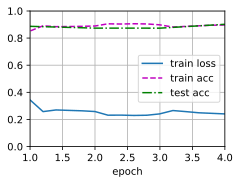

In [192]:
lr, num_epochs = 0.003, 4
trainer = torch.optim.Adam(net.parameters(), lr=lr)
loss = nn.CrossEntropyLoss(reduction="none")
d2l.train_ch13(net, train_iter, test_iter, loss, trainer, num_epochs, devices)

In [193]:
#@save
def predict_sentiment(net, vocab, sequence):
    """Predict the sentiment of a text sequence."""
    sequence = torch.tensor(vocab[sequence.split()], device=d2l.try_gpu())
    label = torch.argmax(net(sequence.reshape(1, -1)), dim=1)
    return 'Negative' if label == 1 else 'Positive'

In [194]:
predict_sentiment(net, vocab, 'this hotel is awesome')

'Positive'

In [195]:
predict_sentiment(net, vocab, "I've been in better hotels, but it wasn't that bad either.")

'Negative'

In [196]:
predict_sentiment(net, vocab,"the service leaves a lot to be desired")

'Negative'

In [197]:
predict_sentiment(net, vocab,"the attention leaves much to be desired, especially the bathroom that was dirty")

'Negative'

In [198]:
predict_sentiment(net, vocab,"the worst place i have been in my life")

'Negative'

In [199]:
predict_sentiment(net,vocab,"I love this hotel")

'Positive'

In [200]:
predict_sentiment(net,vocab,"I like this hotel")

'Positive'

In [201]:
predict_sentiment(net,vocab,"The hotel is too big, I couldn't fully explore it")

'Negative'

In [202]:
predict_sentiment(net,vocab,"The hotel is too big, I couldn't fully explore it. I liked")

'Negative'